# Surviving the Titanic Shipwreck - Experiment with Passenger Profiles

Install requirements 

***pip3 install -r requirements_jupyter.txt***


In [1]:
# !pip3 install -r requirements_jupyter.txt

In [2]:
#!/usr/bin/env python
import matplotlib.pyplot as plt; plt.rcdefaults()
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
from sklearn.feature_selection import RFE


In [3]:
# download the data from the Vanderbilt University Department of Biostatistics servers

titanic_df = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv')
 

In [4]:
# take a peek at the data
titanic_df.head() 

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [5]:
titanic_df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

<H1>Data Exploration</H1>

In [6]:
# feature data types
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [7]:
# summary of quantitative data
titanic_df.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881138     0.498854     0.385027   
std       0.837836     0.486055    14.413493     1.041658     0.865560   
min       1.000000     0.000000     0.170000     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

In [8]:
# count missing data
titanic_missing_count = titanic_df.isnull().sum().sort_values(ascending=False)
pd.DataFrame({'Percent Missing':titanic_missing_count/len(titanic_df)})


Percent Missing
body              0.907563
cabin             0.774637
boat              0.628724
home.dest         0.430863
age               0.200917
embarked          0.001528
fare              0.000764
ticket            0.000000
parch             0.000000
sibsp             0.000000
sex               0.000000
name              0.000000
survived          0.000000
pclass            0.000000

In [9]:
titanic_df['cabin'].head()

0         B5
1    C22 C26
2    C22 C26
3    C22 C26
4    C22 C26
Name: cabin, dtype: object

In [10]:
titanic_feature_count = titanic_df.groupby('cabin')['cabin'].count().reset_index(name = "Group_Count")
titanic_feature_count.sort_values('Group_Count', ascending=False).head(10)

cabin  Group_Count
80       C23 C25 C27            6
184               G6            5
47   B57 B59 B63 B66            5
60           B96 B98            4
183               F4            4
181              F33            4
180               F2            4
79           C22 C26            4
117                D            4
102              C78            4

In [11]:
titanic_feature_count = titanic_df.groupby('name')['name'].count().reset_index(name = "Group_Count")
titanic_feature_count.sort_values('Group_Count', ascending=False).head(10)

name  Group_Count
261                             Connolly, Miss. Kate            2
638                                 Kelly, Mr. James            2
0                                Abbing, Mr. Anthony            1
879  O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)            1
877                              O'Brien, Mr. Thomas            1
876                        Nysveen, Mr. Johan Hansen            1
875                         Nysten, Miss. Anna Sofia            1
874                     Nye, Mrs. (Elizabeth Ramell)            1
873                              Novel, Mr. Mansouer            1
872     Nourney, Mr. Alfred ("Baron von Drachstedt")            1

<H1>Data Preparation</H1>

In [12]:
# strip first letter from cabin number if there
titanic_df['cabin'] = titanic_df['cabin'].replace(np.NaN, 'U') 
titanic_df['cabin'] = [ln[0] for ln in titanic_df['cabin'].values]
titanic_df['cabin'] = titanic_df['cabin'].replace('U', 'Unknown') 
titanic_df['cabin'].head()

0    B
1    C
2    C
3    C
4    C
Name: cabin, dtype: object

In [13]:
titanic_feature_count = titanic_df.groupby('cabin')['cabin'].count().reset_index(name = "Group_Count")
titanic_feature_count.sort_values('Group_Count', ascending=False).head(10)


cabin  Group_Count
8  Unknown         1014
2        C           94
1        B           65
3        D           46
4        E           41
0        A           22
5        F           21
6        G            5
7        T            1

In [14]:

# create title field and get extract title name
titanic_df['title'] = [ln.split()[1] for ln in titanic_df['name'].values]
titanic_df['title'].value_counts()
titanic_df['title'] = [title if title in ['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.', 'Rev.'] else 'Unknown'
                       for title in titanic_df['title'].values ]
titanic_df['title'].head()

0      Miss.
1    Master.
2      Miss.
3        Mr.
4       Mrs.
Name: title, dtype: object

In [15]:



# create isfemale field and use numerical values
titanic_df['isfemale'] = np.where(titanic_df['sex'] == 'female', 1, 0)

# drop features not needed for model 
titanic_df = titanic_df[[f for f in list(titanic_df) if f not in ['sex', 'name', 'boat','body', 'ticket', 'home.dest']]]

# make pclass actual categorical column
titanic_df['pclass'] = np.where(titanic_df['pclass'] == 1, 'First', 
                                np.where(titanic_df['pclass'] == 2, 'Second', 'Third'))


titanic_df['embarked'] = titanic_df['embarked'].replace(np.NaN, 'Unknown') 


titanic_df.head()

pclass  survived    age  sibsp  parch      fare cabin embarked    title  \
0  First         1  29.00      0      0  211.3375     B        S    Miss.   
1  First         1   0.92      1      2  151.5500     C        S  Master.   
2  First         0   2.00      1      2  151.5500     C        S    Miss.   
3  First         0  30.00      1      2  151.5500     C        S      Mr.   
4  First         0  25.00      1      2  151.5500     C        S     Mrs.   

   isfemale  
0         1  
1         0  
2         1  
3         0  
4         1

## Making Dummy Fields

In [16]:
pd.get_dummies(titanic_df['cabin'], columns=['cabin'], drop_first=False).head(10)

A  B  C  D  E  F  G  T  Unknown
0  0  1  0  0  0  0  0  0        0
1  0  0  1  0  0  0  0  0        0
2  0  0  1  0  0  0  0  0        0
3  0  0  1  0  0  0  0  0        0
4  0  0  1  0  0  0  0  0        0
5  0  0  0  0  1  0  0  0        0
6  0  0  0  1  0  0  0  0        0
7  1  0  0  0  0  0  0  0        0
8  0  0  1  0  0  0  0  0        0
9  0  0  0  0  0  0  0  0        1

<H1>Modeling with Logistic Regression</H1>

In [17]:
# get average survival rate to compare to prediction values
average_survival_rate = np.mean(titanic_df['survived']) * 100
print('Average probability of surviving Titanic trip: %.2f percent' % average_survival_rate)


Average probability of surviving Titanic trip: 38.20 percent


In [18]:
def prepare_data_for_model(raw_dataframe, target_columns, drop_first = True, make_na_col = True):
    # dummy all categorical fields 
    dataframe_dummy = pd.get_dummies(raw_dataframe, columns=target_columns, 
                                     drop_first=drop_first, 
                                     dummy_na=make_na_col)
    return (dataframe_dummy)

# create dummy features 
titanic_ready_df = prepare_data_for_model(titanic_df, target_columns=['pclass', 'cabin', 'embarked', 'title'])
titanic_ready_df = titanic_ready_df.dropna() 
list(titanic_ready_df)

['survived',
 'age',
 'sibsp',
 'parch',
 'fare',
 'isfemale',
 'pclass_Second',
 'pclass_Third',
 'pclass_nan',
 'cabin_B',
 'cabin_C',
 'cabin_D',
 'cabin_E',
 'cabin_F',
 'cabin_G',
 'cabin_T',
 'cabin_Unknown',
 'cabin_nan',
 'embarked_Q',
 'embarked_S',
 'embarked_Unknown',
 'embarked_nan',
 'title_Master.',
 'title_Miss.',
 'title_Mr.',
 'title_Mrs.',
 'title_Rev.',
 'title_Unknown',
 'title_nan']

In [19]:
# split data into train and test portions and model
from sklearn.model_selection import train_test_split
features = [feat for feat in list(titanic_ready_df) if feat != 'survived']
X_train, X_test, y_train, y_test = train_test_split(titanic_ready_df[features], 
                                                 titanic_ready_df[['survived']], 
                                                 test_size=0.5, 
                                                 random_state=42)
X_train.head(3)


age  sibsp  parch    fare  isfemale  pclass_Second  pclass_Third  \
455   63.0      1      0  26.000         0              1             0   
83    64.0      1      1  26.550         1              0             0   
1228  31.0      0      0   7.925         0              0             1   

      pclass_nan  cabin_B  cabin_C    ...      embarked_S  embarked_Unknown  \
455            0        0        0    ...               1                 0   
83             0        1        0    ...               1                 0   
1228           0        0        0    ...               1                 0   

      embarked_nan  title_Master.  title_Miss.  title_Mr.  title_Mrs.  \
455              0              0            0          1           0   
83               0              0            0          0           1   
1228             0              0            0          1           0   

      title_Rev.  title_Unknown  title_nan  
455            0              0          0  
83             0              0          0  
1228           0              0          0  

[3 rows x 28 columns]

In [20]:
print(y_train.head(3))

      survived
455          0
83           1
1228         1


In [21]:
 

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train.values.ravel())


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
# predict on test portion and get accuracy score
y_pred = lr_model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'
      .format(lr_model.score(X_test, y_test)*100))


Accuracy of logistic regression classifier on test set: 79.35%


<H2>Interpretation of Model’s Coefficients</H2>

In [23]:
coefs = pd.DataFrame({'Feature':features, 'Coef':lr_model.coef_[0]})
print('Positive Features')
coefs.sort_values('Coef', ascending=False).head(7)

Positive Features


Feature      Coef
4        isfemale  1.943663
21  title_Master.  1.819171
24     title_Mrs.  0.956866
10        cabin_D  0.729880
11        cabin_E  0.397124
12        cabin_F  0.181792
13        cabin_G  0.161272

In [24]:
print('Negative Features')
coefs.sort_values('Coef', ascending=False).tail(7)

Negative Features


Feature      Coef
8         cabin_B -0.354787
1           sibsp -0.546999
9         cabin_C -0.690267
6    pclass_Third -0.739187
23      title_Mr. -0.761340
17     embarked_Q -1.030018
15  cabin_Unknown -1.225105

<H2>Recursive Feature Elimination (RFE) method</H2>

In [25]:
from sklearn.feature_selection import RFE
rfe = RFE(lr_model, 1)
rfe = rfe.fit(X_train, np.ravel(y_train))

# get feature rank in order from elimination process
feature_rank = pd.DataFrame({'Feature':list(X_train),'Rank':rfe.ranking_ })
feature_rank = feature_rank.sort_values('Rank')
feature_rank.head()


Feature  Rank
4        isfemale     1
21  title_Master.     2
15  cabin_Unknown     3
17     embarked_Q     4
6    pclass_Third     5

<H1>Predict using Fictional Passenger</H1>

In [26]:
# Create your own passenger - ranges and options available
x_predict_pclass = 'Third' # First, Second, Third
x_predict_is_female=1 # 0-1
x_predict_age=10 # 0-100
x_predict_sibsp=3 #  (0-8)
x_predict_parch = 0 #  (0-9)
x_predict_fare = 200 #  (0-500)
x_predict_cabin = 'A' # 'A', 'C', 'B', 'E', 'D', 'G', 'F', 'T', 'Z' 
x_predict_embarked = 'Q' #  'Q', 'S', 'C' # Cherbourg Queenstown Southampton
x_predict_title = 'Mrs.' # ['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.', 'Rev.', Unknown]
 

In [27]:
# Create your own passenger
x_predict_pclass = 'Third' 
x_predict_is_female=0  
x_predict_age=50 
x_predict_sibsp=3 
x_predict_parch = 0  
x_predict_fare = 200  
x_predict_cabin = 'A'  
x_predict_embarked = 'Q'  
x_predict_title = 'Mr.'  

In [28]:
# make a copy of the original data set in order to create dummy categories that are the same as seen on 
# original data
titanic_df_tmp = titanic_df.copy()
# add new row to titanic df
titanic_df_tmp = titanic_df_tmp[['pclass', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked', 'title', 'isfemale', 'survived']] 

titanic_fictional_df = pd.DataFrame([[x_predict_pclass, 
                                     x_predict_age,
                                     x_predict_sibsp,
                                     x_predict_parch,
                                     x_predict_fare,
                                     x_predict_cabin,
                                     x_predict_embarked,
                                     x_predict_title,
                                     x_predict_is_female,
                                     0]], columns = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked', 'title', 'isfemale', 'survived']) 


In [29]:
# titanic_df_tmp.append(titanic_fictional_df)
titanic_df_tmp = pd.concat([titanic_fictional_df, titanic_df_tmp], ignore_index=True)
# titanic_df_tmp = pd.get_dummies(titanic_df_tmp)
titanic_df_tmp = prepare_data_for_model(titanic_df_tmp, target_columns=['pclass', 'cabin', 'embarked', 'title'])

Y_pred = lr_model.predict_proba(titanic_df_tmp[features].head(1))
probability_of_surviving_fictional_character = Y_pred[0][1] * 100
print('Probability of surviving Titanic voyage: %.2f percent' % probability_of_surviving_fictional_character)



Probability of surviving Titanic voyage: 3.10 percent


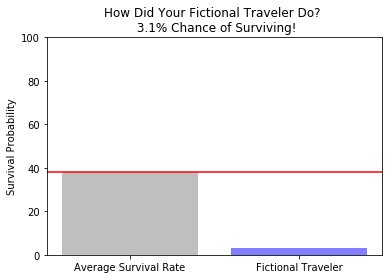

In [30]:
fig = plt.figure()
objects = ('Average Survival Rate', 'Fictional Traveler')
y_pos = np.arange(len(objects))
performance = [average_survival_rate, probability_of_surviving_fictional_character]
 
ax = fig.add_subplot(111)
colors = ['gray', 'blue']
plt.bar(y_pos, performance, align='center', color = colors, alpha=0.5)
plt.xticks(y_pos, objects)
plt.axhline(average_survival_rate, color="r")
plt.ylim([0,100])
plt.ylabel('Survival Probability')
plt.title('How Did Your Fictional Traveler Do? \n ' + str(round(probability_of_surviving_fictional_character,2)) + '% Chance of Surviving!')
 
plt.show()

## Preparing data set for the cloud and making it pandas free!

In [31]:
titanic_df = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv')

# get title
titanic_df['title'] = [ln.split()[1] for ln in titanic_df['name'].values]
titanic_df['title'] = [title if title in ['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.', 'Rev.'] else 'Unknown'
                   for title in titanic_df['title'].values ]

# strip first letter from cabin number if there
titanic_df['cabin'] = titanic_df['cabin'].replace(np.NaN, 'U')
titanic_df['cabin'] = [ln[0] for ln in titanic_df['cabin'].values]
titanic_df['cabin'] = titanic_df['cabin'].replace('U', 'Unknown')

titanic_df['isfemale'] = np.where(titanic_df['sex'] == 'female', 1, 0)

# drop features not needed for model
titanic_df = titanic_df[[f for f in list(titanic_df) if f not in ['sex', 'name', 'boat','body', 'ticket', 'home.dest']]]

# make pclass actual categorical column
titanic_df['pclass'] = np.where(titanic_df['pclass'] == 1, 'First',
                            np.where(titanic_df['pclass'] == 2, 'Second', 'Third'))

# get average survival rate
average_survival_rate = np.mean(titanic_df['survived']) * 100

titanic_df['embarked'] = titanic_df['embarked'].replace(np.NaN, 'Unknown')

# prepare training data
titanic_ready_df = prepare_data_for_model(titanic_df, target_columns=['pclass', 'cabin', 'embarked', 'title'])
titanic_ready_df = titanic_ready_df.dropna() 

# save dataframe without header or index
titanic_ready_df.to_csv('titanic3.csv', header=False, index=False)

In [32]:
# load the data as an array instead of a data frame
from numpy import genfromtxt
titanic_array = genfromtxt('titanic3.csv', delimiter=',')


In [33]:
# split data into train and test portions and model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split([item[1:] for item in titanic_array], 
                                                 [item[0] for item in titanic_array], 
                                                 test_size=0.5, 
                                                 random_state=42)
 

In [34]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
# let's check that our model works by feeding an array instead of a dataframe
average_survival_rate = np.mean([item[0] for item in titanic_array]) 

X_train, X_test, y_train, y_test = train_test_split([item[1:] for item in titanic_array], 
                                             [item[0] for item in titanic_array], 
                                             test_size=0.5, 
                                             random_state=42)


# fit model only once
lr_model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
# check that we can get the average survival rate without pandas
np.mean([item[0] for item in titanic_array])  

0.40861244019138754